<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="240" height="100" /></center>

# <center><b>Ensemble Learning - Part I<b></center>

---
<a name = Section2></a>
# **2. Problem Statement**
---

<center><img src="https://www.reno.gov/Home/ShowImage?id=7739&t=635620964226970000"></center>

**<h4>Scenario:</h4>**

- **Property Hall** is a Canadian **real estate** company that facilitates  a transaction between the buyers and sellers of property.

- The company's **revenue** is **down** for the past three months and they want to identify its root cause.

- They are looking for an **automatic way** to detect **unusual behavior** in their revenue.

- The company already has **access** to the **data** of **houses** in the city of Windsor.

- To identify unusual behavior, they have hired a team of data scientists. **Consider you are one of them...**

In [1]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd  # Importing for panel data analysis
# from pandas_profiling import ProfileReport  
# Import Pandas Profiling (To generate Univariate Analysis)

pd.set_option('display.max_columns',
              None)  # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth',
              None)  # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows',
              None)  # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment',
              None)  # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.2f' % x
              )  # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt  # Importing pyplot interface using matplotlib
import seaborn as sns  # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.feature_selection import SelectFromModel  
# To perform Feature Selection over model
from yellowbrick.model_selection import FeatureImportances  
# To retrieve Feature Importances over model
from sklearn.metrics import classification_report  
# To generate classification report of the model
from sklearn.metrics import plot_confusion_matrix  
# To plot confusion matrix of the model
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split  
# To perform train, test and split over the data
from sklearn.linear_model import LogisticRegression  
# To perform modeling using LogisticRegression
from sklearn.svm import SVC  # To perform modeling using SVC
from sklearn.tree import DecisionTreeClassifier  
# To perform modeling using DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier  
# To perform modeling using RandomForestClassifier
from sklearn.ensemble import VotingClassifier  # To perform modeling using VotingClassifier
from sklearn.ensemble import BaggingClassifier  
# To perform modeling using BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier  
# To perform modeling using AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier  
# To perform modeling using GradientBoostingClassifier
#-------------------------------------------------------------------------------------------------------------------------------
import warnings  # Importing warning to disable runtime warnings

warnings.filterwarnings("ignore")  # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset is based on **real estate** provided by Property Hall and it is accessible <a href="https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv">**here**</a>.

</br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 546 | 12 | 22 KB| 

</br>

| Id | Features | Description |
| :-- | :--| :--| 
|01|**price**|Sale price of a house.|
|02|**lotsize**|The lot size of a property in square feet.|
|03|**bedrooms**|Number of bedrooms.|
|04|**bathrms**|Number of bathrooms.|
|05|**stories**|Number of stories excluding basement.|
|06|**driveway**|Does the house has a driveway?|
|07|**recroom**|Does the house has a recreational room?|
|08|**fullbase**|Does the house has a full finished basement?|
|09|**gashw**|Does the house uses gas for hot water heating?|
|10|**airco**|Does the house has central air conditioning?|
|11|**garagepl**|Number of garage places.|
|12|**prefarea**|Is the house located in the preferred neighbourhood of the city?|

In [2]:
data = pd.read_csv(
    filepath_or_buffer=
    'https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Housing.csv'
)
print('Data Shape:', data.shape)
data.head()

Data Shape: (546, 12)


price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
0 42000.00     5850         3        1        2      yes      no      yes   
1 38500.00     4000         2        1        1      yes      no       no   
2 49500.00     3060         3        1        1      yes      no       no   
3 60500.00     6650         3        1        2      yes     yes       no   
4 61000.00     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
0    no    no         1       no  
1    no    no         0       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no

In [3]:
data.describe()

price  lotsize  bedrooms  bathrms  stories  garagepl
count    546.00   546.00    546.00   546.00   546.00    546.00
mean   68121.60  5150.27      2.97     1.29     1.81      0.69
std    26702.67  2168.16      0.74     0.50     0.87      0.86
min    25000.00  1650.00      1.00     1.00     1.00      0.00
25%    49125.00  3600.00      2.00     1.00     1.00      0.00
50%    62000.00  4600.00      3.00     1.00     2.00      0.00
75%    82000.00  6360.00      3.00     2.00     2.00      1.00
max   190000.00 16200.00      6.00     4.00     4.00      3.00

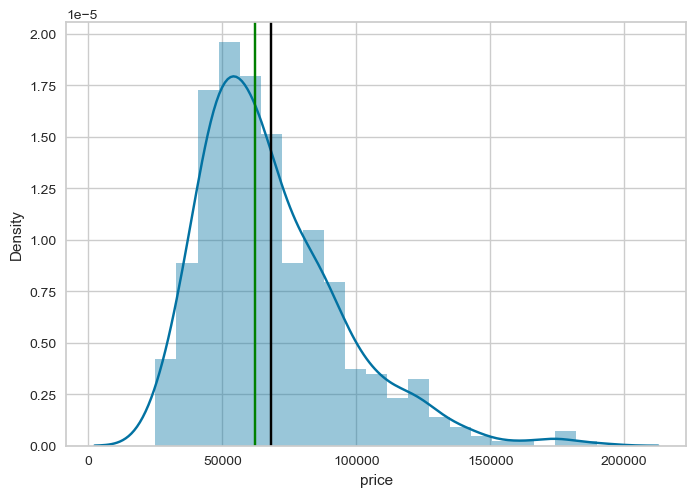

In [4]:
sns.distplot(data['price'])
plt.axvline(data.price.mean(), color='black')
plt.axvline(data.price.median(), color='green')
plt.show()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   price     546 non-null    float64
 1   lotsize   546 non-null    int64  
 2   bedrooms  546 non-null    int64  
 3   bathrms   546 non-null    int64  
 4   stories   546 non-null    int64  
 5   driveway  546 non-null    object 
 6   recroom   546 non-null    object 
 7   fullbase  546 non-null    object 
 8   gashw     546 non-null    object 
 9   airco     546 non-null    object 
 10  garagepl  546 non-null    int64  
 11  prefarea  546 non-null    object 
dtypes: float64(1), int64(5), object(6)
memory usage: 51.3+ KB


In [6]:
data.shape

(546, 12)

In [7]:
data = data.drop_duplicates()
data.shape

(545, 12)

# EDA

### Lets try to figure out the asscociation of bedrooms, bathrooms, stories and garage places wrt price?

In [8]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [9]:
num_cols = ['bedrooms', 'bathrms', 'stories', 'garagepl', 'lotsize']
num_cols

['bedrooms', 'bathrms', 'stories', 'garagepl', 'lotsize']

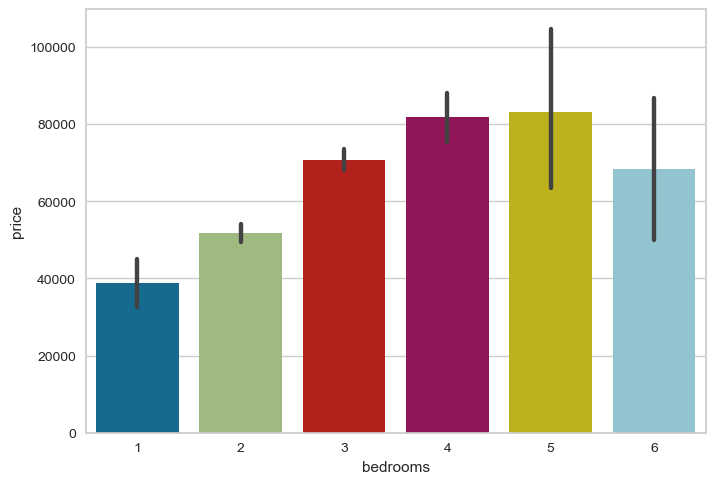

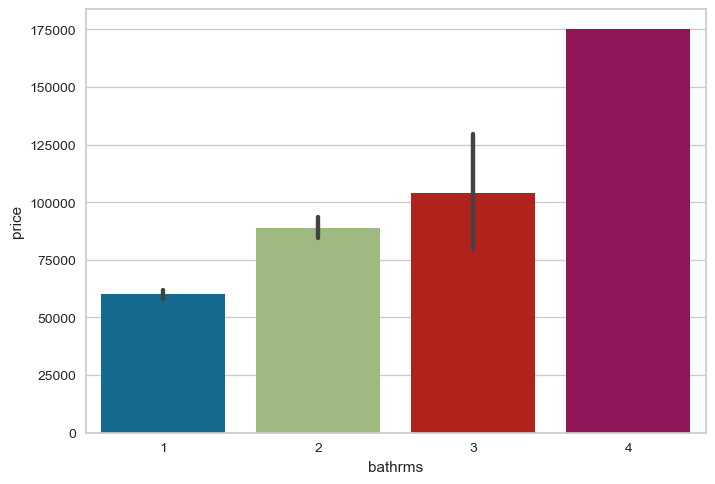

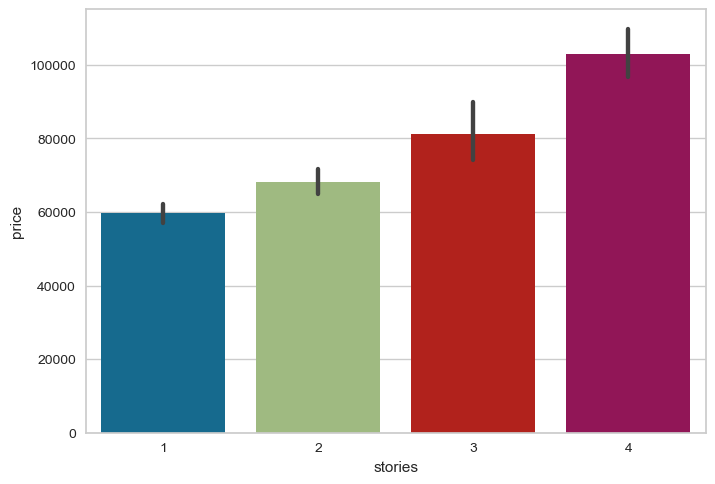

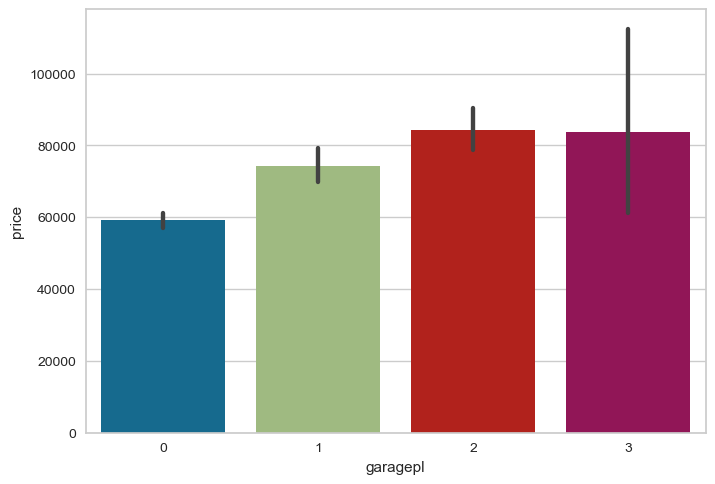

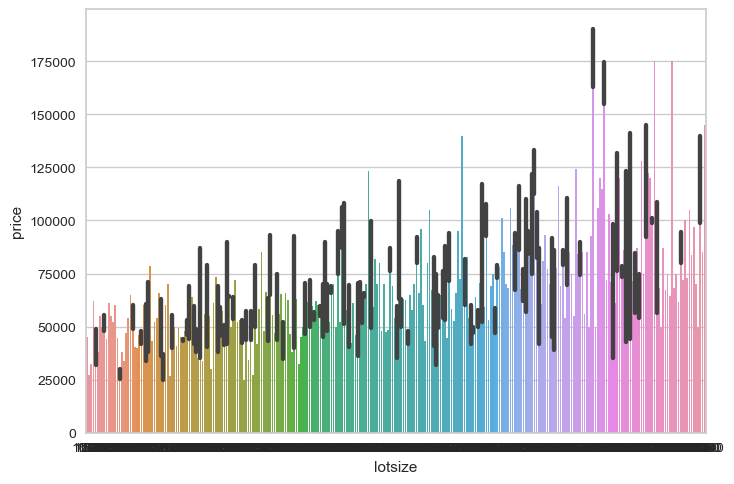

In [10]:
for c in num_cols:
    sns.barplot(x=data[c], y=data.price)
    plt.show()
    print("="*70)

In [11]:
data.columns

Index(['price', 'lotsize', 'bedrooms', 'bathrms', 'stories', 'driveway',
       'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea'],
      dtype='object')

In [12]:
data.head(2)

price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
0 42000.00     5850         3        1        2      yes      no      yes   
1 38500.00     4000         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
0    no    no         1       no  
1    no    no         0       no

In [13]:
cat_cols = ['driveway','recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
cat_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [14]:
for c in cat_cols:
    print(data[c].value_counts())
    print("."*70)
    print(data[c].value_counts(normalize=True)*100)
    print("="*70)

yes    468
no      77
Name: driveway, dtype: int64
......................................................................
yes   85.87
no    14.13
Name: driveway, dtype: float64
no     448
yes     97
Name: recroom, dtype: int64
......................................................................
no    82.20
yes   17.80
Name: recroom, dtype: float64
no     354
yes    191
Name: fullbase, dtype: int64
......................................................................
no    64.95
yes   35.05
Name: fullbase, dtype: float64
no     520
yes     25
Name: gashw, dtype: int64
......................................................................
no    95.41
yes    4.59
Name: gashw, dtype: float64
no     373
yes    172
Name: airco, dtype: int64
......................................................................
no    68.44
yes   31.56
Name: airco, dtype: float64
no     417
yes    128
Name: prefarea, dtype: int64
......................................................................
no    7

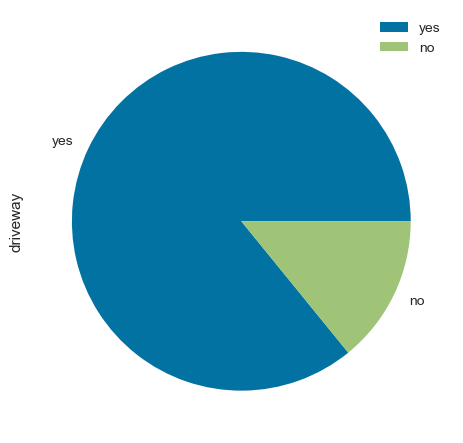

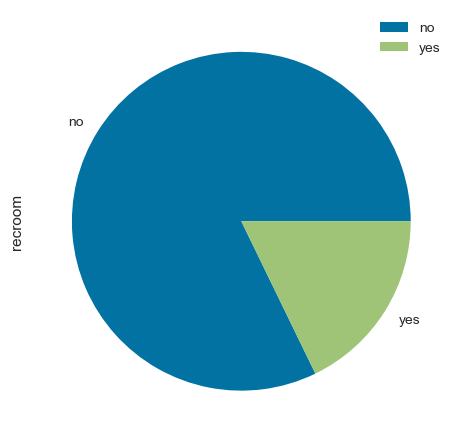

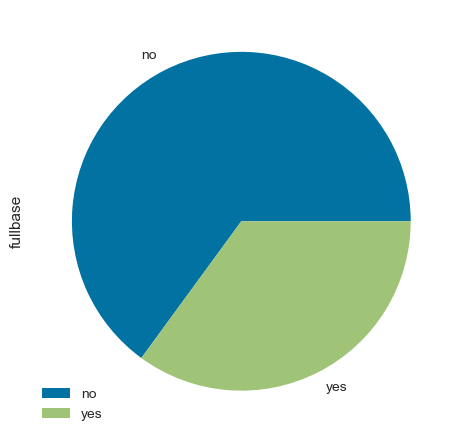

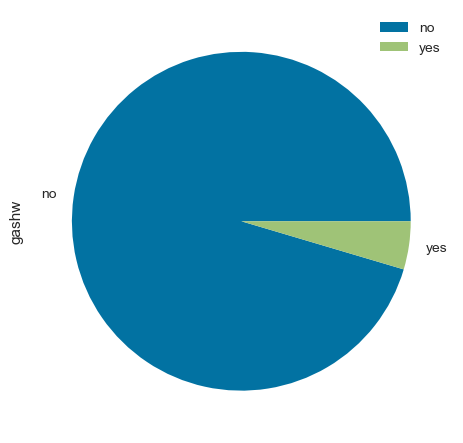

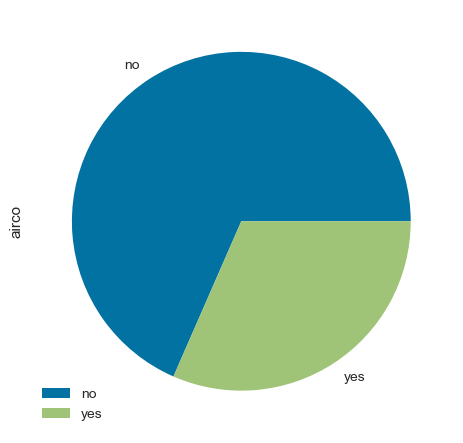

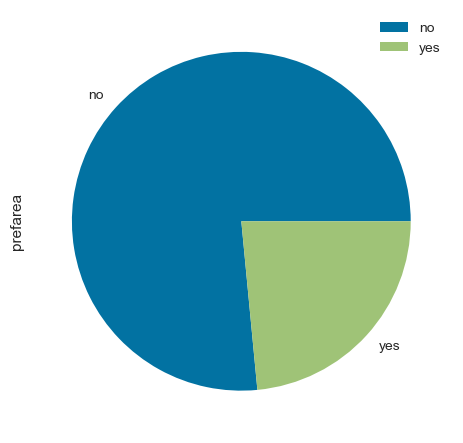

In [15]:
for c in cat_cols:
    data[c].value_counts().plot(kind='pie', legend=True)
    plt.show()
    print("="*70)

In [16]:
data.head()

price  lotsize  bedrooms  bathrms  stories driveway recroom fullbase  \
0 42000.00     5850         3        1        2      yes      no      yes   
1 38500.00     4000         2        1        1      yes      no       no   
2 49500.00     3060         3        1        1      yes      no       no   
3 60500.00     6650         3        1        2      yes     yes       no   
4 61000.00     6360         2        1        1      yes      no       no   

  gashw airco  garagepl prefarea  
0    no    no         1       no  
1    no    no         0       no  
2    no    no         0       no  
3    no    no         0       no  
4    no    no         0       no

In [17]:
ohe_cols = ['driveway','recroom', 'fullbase', 'gashw', 'airco', 'prefarea']
ohe_cols

['driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'prefarea']

In [18]:
data = pd.get_dummies(data, columns=ohe_cols, drop_first=True)
data.head()

price  lotsize  bedrooms  bathrms  stories  garagepl  driveway_yes  \
0 42000.00     5850         3        1        2         1             1   
1 38500.00     4000         2        1        1         0             1   
2 49500.00     3060         3        1        1         0             1   
3 60500.00     6650         3        1        2         0             1   
4 61000.00     6360         2        1        1         0             1   

   recroom_yes  fullbase_yes  gashw_yes  airco_yes  prefarea_yes  
0            0             1          0          0             0  
1            0             0          0          0             0  
2            0             0          0          0             0  
3            1             0          0          0             0  
4            0             0          0          0             0

In [19]:
data.shape

(545, 12)

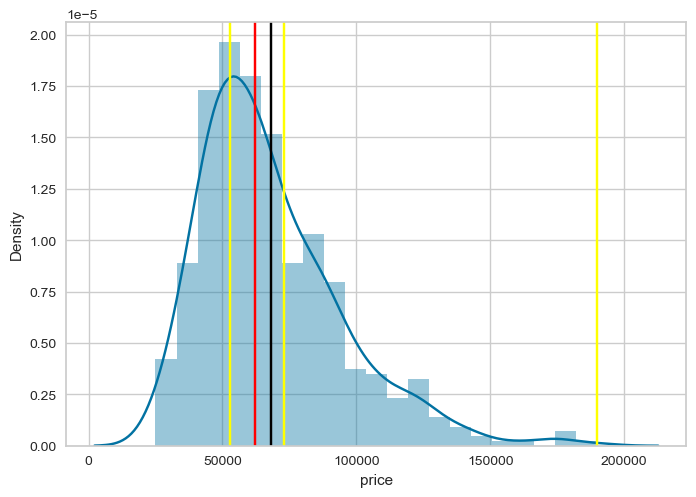

In [22]:
sns.distplot(data['price'])
plt.axvline(data.price.mean(), color='black')
plt.axvline(data.price.quantile(0.33), color='yellow')
plt.axvline(data.price.quantile(0.66), color='yellow')
plt.axvline(data.price.quantile(1.0), color='yellow')
plt.axvline(data.price.median(), color='red')
plt.show()

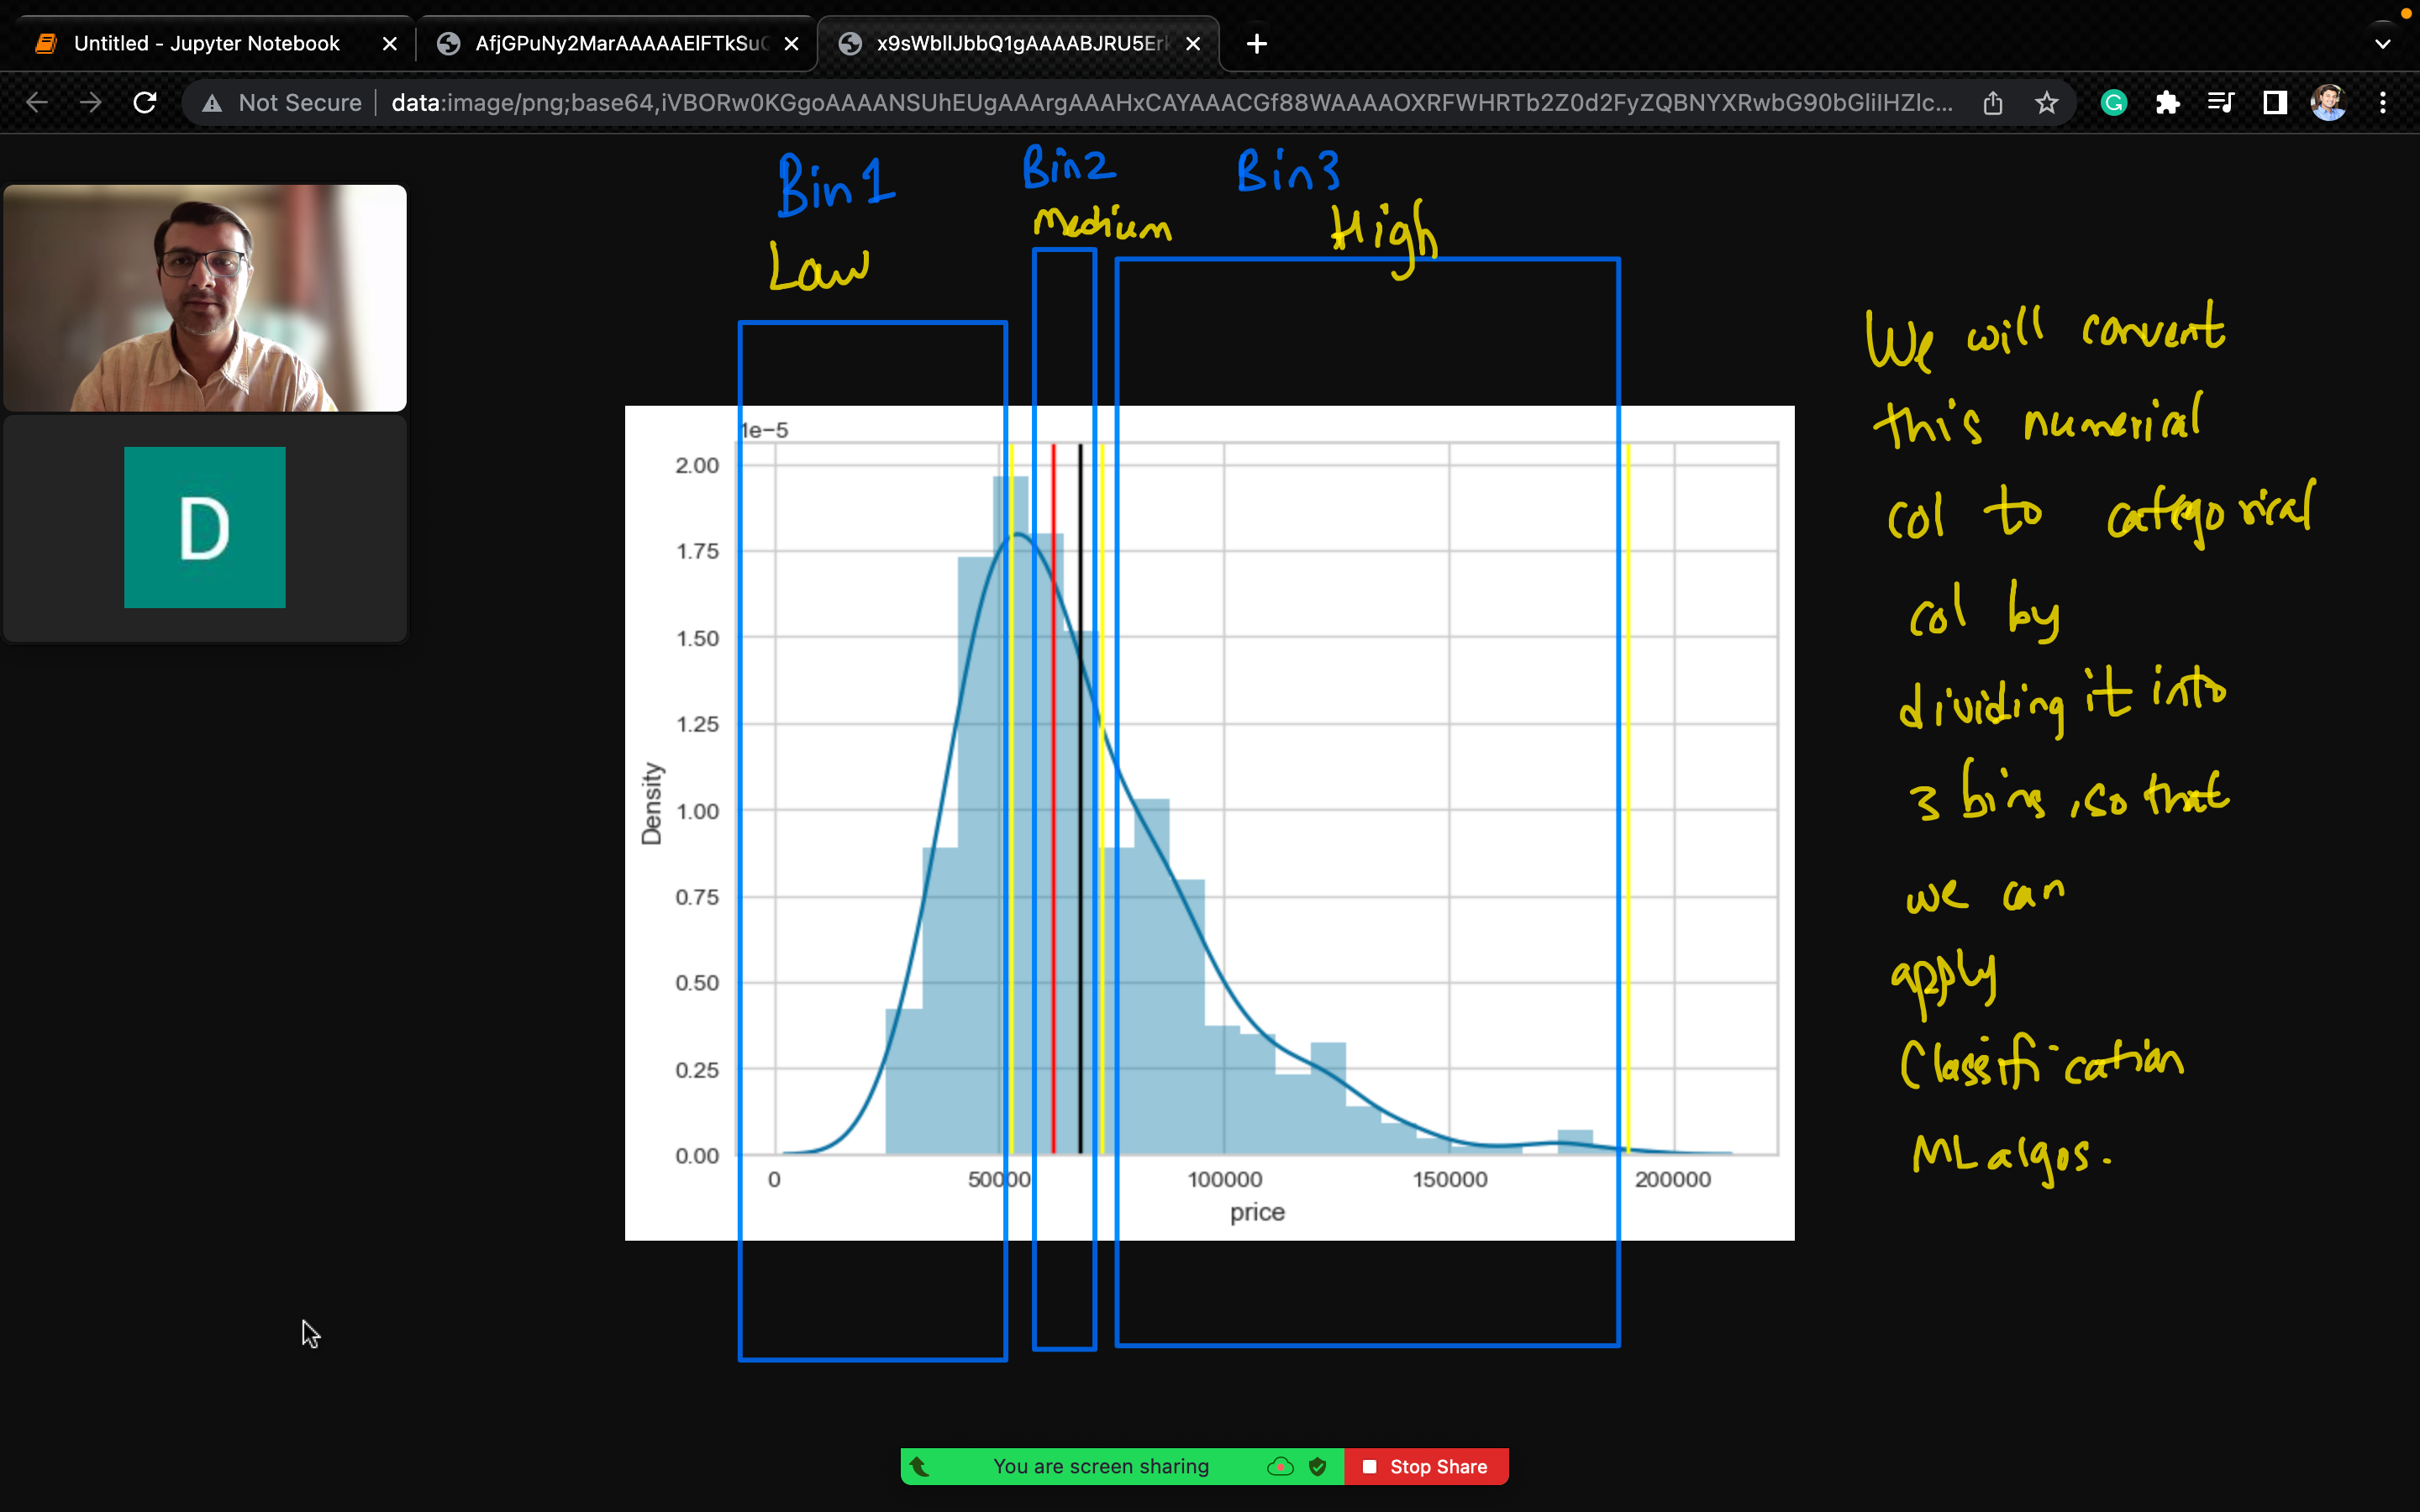

In [23]:
q1 = data.price.quantile(0.33)
q2 = data.price.quantile(0.66)
q3 = data.price.quantile(1.)
print(q1, q2, q3)

52900.0 73000.0 190000.0


In [25]:
data['price_cut'] = pd.cut(data.price, bins=[0,q1,q2,q3], labels=['Low','Medium','High'])
data.price_cut.value_counts()

High      184
Low       181
Medium    180
Name: price_cut, dtype: int64

In [26]:
data.head(2)

price  lotsize  bedrooms  bathrms  stories  garagepl  driveway_yes  \
0 42000.00     5850         3        1        2         1             1   
1 38500.00     4000         2        1        1         0             1   

   recroom_yes  fullbase_yes  gashw_yes  airco_yes  prefarea_yes price_cut  
0            0             1          0          0             0       Low  
1            0             0          0          0             0       Low

In [27]:
data.drop(['price'], axis=1, inplace=True)
data.head(2)

lotsize  bedrooms  bathrms  stories  garagepl  driveway_yes  recroom_yes  \
0     5850         3        1        2         1             1            0   
1     4000         2        1        1         0             1            0   

   fullbase_yes  gashw_yes  airco_yes  prefarea_yes price_cut  
0             1          0          0             0       Low  
1             0          0          0             0       Low

In [29]:
X = data.drop('price_cut', axis=1)
y = data.price_cut

In [31]:
X.head(1)

lotsize  bedrooms  bathrms  stories  garagepl  driveway_yes  recroom_yes  \
0     5850         3        1        2         1             1            0   

   fullbase_yes  gashw_yes  airco_yes  prefarea_yes  
0             1          0          0             0

In [28]:
data.shape

(545, 12)

## Feature Selection

https://www.datatechnotes.com/2021/04/selectfrommodel-feature-selection.html

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

est = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
selector = SelectFromModel(estimator=est)
selector.fit(X, y)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=42))

In [33]:
selector.get_support()

array([ True, False,  True, False, False, False, False, False, False,
       False, False])

In [34]:
X.columns

Index(['lotsize', 'bedrooms', 'bathrms', 'stories', 'garagepl', 'driveway_yes',
       'recroom_yes', 'fullbase_yes', 'gashw_yes', 'airco_yes',
       'prefarea_yes'],
      dtype='object')

In [36]:
X.columns[selector.get_support()]

Index(['lotsize', 'bathrms'], dtype='object')

In [38]:
selected_features = X.columns[selector.get_support()].to_list()
selected_features

['lotsize', 'bathrms']

In [39]:
selector.threshold_

0.09090909090909091

In [40]:
selector.estimator

RandomForestClassifier(n_jobs=-1, random_state=42)

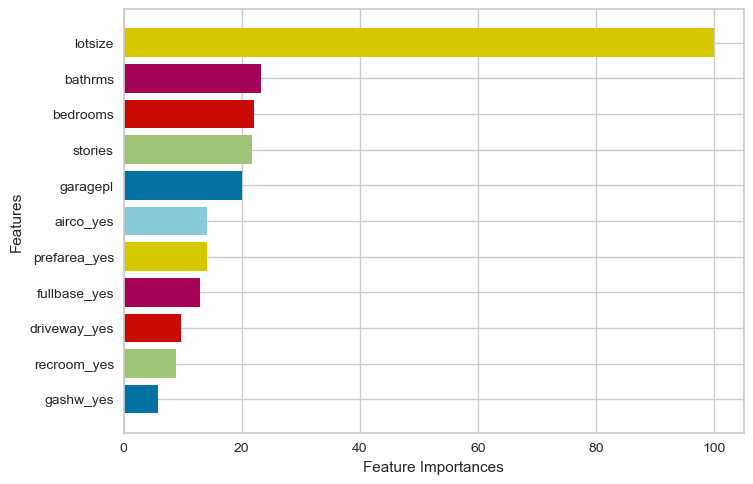

In [42]:
from yellowbrick.model_selection import FeatureImportances

fi = FeatureImportances(selector.estimator)
fi.fit(X, y)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

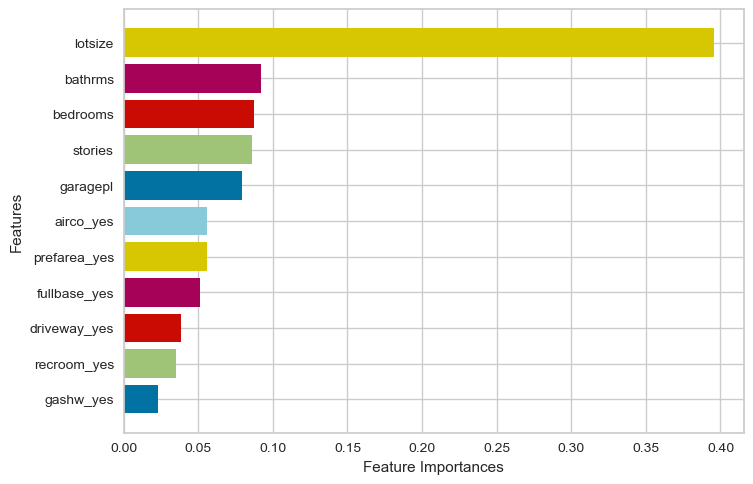

In [44]:
from yellowbrick.model_selection import FeatureImportances

fi = FeatureImportances(selector.estimator, relative=False)
fi.fit(X, y)
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

In [45]:
X.shape

(545, 11)

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((436, 11), (109, 11), (436,), (109,))

## Voting Classifier

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [49]:
from sklearn.ensemble import BaggingClassifier, VotingClassifier

In [50]:
log_reg = LogisticRegression(random_state=42, class_weight='balanced')
svc = SVC(random_state=42, class_weight='balanced')
dtc = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [51]:
BaggingClassifier(base_estimator=dtc, n_estimators=500, n_jobs=-1, random_state=42)

rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42, class_weight='balanced')

In [53]:
est = [('lr', log_reg), ('svc', svc), ('dt', dtc), ('rf', rfc)]
vc = VotingClassifier(estimators=est, voting='soft')